<h1>Plant Recognition using Convolutional Neural Network.</h1>

## *Problem Statement*:
Recognition of whether the input image of the plant is rice or wheat.

## *Authors*:
<ul>
    <li>Nour Bahaa</li>
    <li>Mai Mahmoud</li>
    <li>Ibrahim Fawzy</li>
    <li>Abanoub George</li>
</ul>

## *Supervisors*:
<ul>
    <li>Prof. Khaled Hussien</li>
    <li>Eng. Hager Sobeah</li>
    <li>Eng. Nour el-huda Ashraf</li>
</ul>



### Importing the main libraries

In [10]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns

### Pre-processing on the Trainning set (*Image Augmentation*)
We are applying some geometerical tranformation to move the pixels to prevent overfitting of the model (Zoom In, Zoom Out, Rotations). 

In [11]:
train_datagenarator = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

trainning_set = train_datagenarator.flow_from_directory('dataset/trainning_set',
                                                         target_size = (64, 64),
                                                         batch_size = 15,
                                                         class_mode = 'binary')

Found 252 images belonging to 2 classes.


### Pre-processing on the Test set

In [12]:
test_datagenarator = ImageDataGenerator(rescale = 1./255)
test_set = test_datagenarator.flow_from_directory('dataset/test_set',
                                                   target_size = (64, 64),
                                                   batch_size = 5,
                                                   class_mode = 'binary')

Found 113 images belonging to 2 classes.


### CNN init
Intiating Our Convolutional Neural Network

In [13]:
cnn = tf.keras.models.Sequential()

###  Convolution Layer
Feature Mapping (Applying filters), the activation function(ReLu) is responsible for performance enhancement because, it will output if positive, otherwise, it will output zero 

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation='relu',
                               input_shape=[64, 64, 3]))

###  Pooling Layer (Max Pooling)
Detect the features in any postition, background, light, texture and pattern

In [15]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer & poolin layer

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,      # Kernal Size is the width and height of the 2D convolution window.

                               activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening
Rotate the matrix to a column matrix for future use of the ANN

In [17]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection
Matching the features with the classes to make a prediction. (units= Hidden Neurons)

In [18]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

###  Output Layer

In [19]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling the CNN
We used Adam Optimizer to update network weights iterative based in training data.

In [20]:
cnn.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

### Trainning the CNN on the Trainning set and evaluating it on the Test set

In [21]:
history = cnn.fit(x = trainning_set,
                  validation_data = test_set,
                  epochs = 10)

Train for 17 steps, validate for 23 steps
Epoch 1/10
17/17 [==============================] - 9s 542ms/step - loss: 0.7378 - accuracy: 0.5794 - val_loss: 0.6431 - val_accuracy: 0.6283
Epoch 2/10
17/17 [==============================] - 4s 236ms/step - loss: 0.5770 - accuracy: 0.7302 - val_loss: 0.6085 - val_accuracy: 0.6283
Epoch 3/10
17/17 [==============================] - 4s 231ms/step - loss: 0.5297 - accuracy: 0.6865 - val_loss: 0.7170 - val_accuracy: 0.6460
Epoch 4/10
17/17 [==============================] - 4s 231ms/step - loss: 0.4092 - accuracy: 0.8532 - val_loss: 0.6765 - val_accuracy: 0.6283
Epoch 5/10
17/17 [==============================] - 4s 208ms/step - loss: 0.3395 - accuracy: 0.8532 - val_loss: 0.7293 - val_accuracy: 0.6726
Epoch 6/10
17/17 [==============================] - 3s 198ms/step - loss: 0.2887 - accuracy: 0.8730 - val_loss: 0.6994 - val_accuracy: 0.6991
Epoch 7/10
17/17 [==============================] - 4s 214ms/step - loss: 0.2622 - accuracy: 0.8889 - val_

### Getting the Average accuracy among all the stages (epochs)

In [22]:
Avg_Acc = np.mean(history.history['accuracy'])
print("The Average Accuracy : ", round(Avg_Acc * 100, 2),' %')

The Average Accuracy :  82.18  %


### Plotting the Accuracy among all the epochs

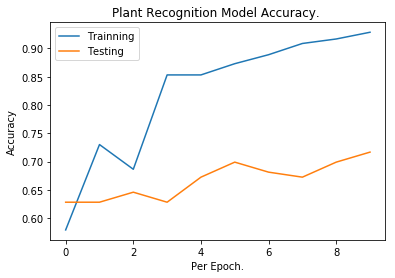

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Plant Recognition Model Accuracy. ')
plt.xlabel('Per Epoch.')
plt.ylabel('Accuracy')
plt.legend(['Trainning', 'Testing'], loc='upper left')
plt.show()

##  Making a prediction

In [24]:
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/wheat_or_rice_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Wheat Plant.'
else:
  prediction = 'Rice Plant.'

In [25]:
print(prediction)

Wheat Plant.


<center><b>End of Notebook.</b></center>